### Telco Customer Churn - Sci Learn <br> Naive Bayes

In [19]:
%matplotlib inline

import os
import sys
import json

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from IPython.display import display
import seaborn as sns
sns.set()

# Naive Bayes from - Sci Learn 
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

# LIME library
import lime
import lime.lime_tabular


# Split data for testing
from sklearn.model_selection import train_test_split

# Add our local functions to the path
sys.path.append(os.path.join(os.pardir, 'src'))

# from models import evaluation
from models import evaluation

ALGORITHM_NAME = 'nb'
COUNTRY = 'mwi'

In [20]:
# Change the default directory
os.chdir('/home/mike/Documents/mkp_code/Institute of Data Course/telco-customer-churn-project/data/processed')

In [21]:
# Upload Customer Churn data to dataframe
customer_data = pd.read_csv('Telco-Customer-Churn-Processed.csv')

In [22]:
# Drop Unnamed: 0 - This column is not needed
customer_data.drop('Unnamed: 0',axis=1,inplace=True)

In [23]:
# Divide the variables from the target column
target_col = ['Churn']

# Remove the target column
categorical_cols = customer_data.columns
categorical_cols = [col for col in categorical_cols if col not in target_col]

In [24]:
# Variables to a dataframe for processing
x= customer_data[categorical_cols]

In [25]:
# select y = Target Column - Churn
y = customer_data.Churn

In [26]:
# Partition the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [27]:
# Fit the model
model = GaussianNB()
%time model.fit(x_train, y_train)

CPU times: user 3.73 ms, sys: 279 µs, total: 4.01 ms
Wall time: 8.34 ms


GaussianNB()

In [28]:
# Get an initial score
%time score = model.score(x_train, y_train)
print("In-sample score: {:0.2%}".format(score))

CPU times: user 3.6 ms, sys: 191 µs, total: 3.79 ms
Wall time: 8.97 ms
In-sample score: 74.36%


In [29]:
# Run the model
y_pred = model.predict(x_train)
y_prob = model.predict_proba(x_train)[:,1]

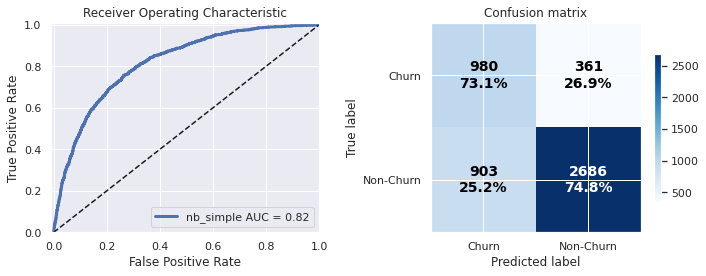

,nb_simple
accuracy,0.743611
recall,0.730798
precision,0.520446
f1,0.607940
cross_entropy,0.954516
roc_auc,0.817912
cohen_kappa,0.425355


In [30]:
# Evaluate performance and store model
metrics = evaluation.evaluate_model(y_train, y_pred, y_prob, 
                                    compare_models=None,
                                    store_model=False,
                                    model_name='simple', 
                                    prefix=ALGORITHM_NAME,
                                    country=COUNTRY,
                                    model=model, 
                                    features=x_train.columns.values)

In [31]:
# Fit the model
model = GaussianNB()
%time model.fit(x_test, y_test)

CPU times: user 4.8 ms, sys: 65 µs, total: 4.86 ms
Wall time: 8.88 ms


GaussianNB()

In [32]:
# Get an initial score
%time score = model.score(x_test, y_test)
print("In-sample score: {:0.2%}".format(score))

CPU times: user 2.65 ms, sys: 36 µs, total: 2.69 ms
Wall time: 2.69 ms
In-sample score: 76.81%


In [33]:
# Run the model
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:,1]

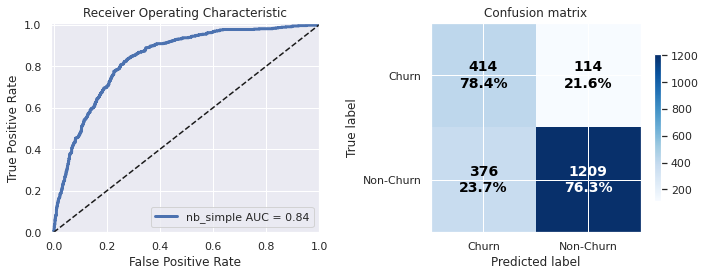

,nb_simple
accuracy,0.768102
recall,0.784091
precision,0.524051
f1,0.628225
cross_entropy,0.998543
roc_auc,0.838885
cohen_kappa,0.469230


In [34]:
# Evaluate performance and store model
metrics = evaluation.evaluate_model(y_test, y_pred, y_prob, 
                                    compare_models=None,
                                    store_model=False,
                                    model_name='simple', 
                                    prefix=ALGORITHM_NAME,
                                    country=COUNTRY,
                                    model=model, 
                                    features=x_test.columns.values)

In [35]:
categorical_cols = x_train.values

In [36]:
# LIME has one explainer for all models 
explainer = lime.lime_tabular.LimeTabularExplainer(x_train.values,          feature_names=x_train.columns.values.tolist(),                          class_names=['Churn'],                             categorical_features=categorical_cols,verbose=True, mode='regression')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()